In [2]:
import pandas as pd

In [3]:
df_main = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Reputation System\\final\\filecoin_messages_cleaned_jan22jan24_compiled1.csv")

In [4]:
df_main.columns

Index(['date', 'sender_account', 'sender_address', 'sender_type',
       'receiver_account', 'receiver_address', 'receiver_type', 'method_id',
       'method_name', 'refundDecimal', 'refund', 'amountDecimal',
       'burnedDecimal', 'overEstimationBurn', 'baseFeeBurn', 'success',
       'minerPenalty', 'minerTip', 'exitCode'],
      dtype='object')

In [5]:
df_analysis = df_main[['date','sender_account','receiver_account','refundDecimal','amountDecimal','minerPenalty', 'minerTip','overEstimationBurn']]


In [6]:
grouped_df_sender = df_main.groupby('sender_account').agg({
    'date': 'count',
    'refundDecimal': 'sum',
    'amountDecimal': 'sum',
    'minerPenalty': 'sum',
    'minerTip': 'sum',
    'overEstimationBurn': 'sum'
})

grouped_df_sender.reset_index(inplace=True)
grouped_df_sender = grouped_df_sender.rename(columns={'date': 'count', 'sender_account': 'account'})

print(grouped_df_sender.columns)


Index(['account', 'count', 'refundDecimal', 'amountDecimal', 'minerPenalty',
       'minerTip', 'overEstimationBurn'],
      dtype='object')


In [7]:
grouped_df_receiver = df_main.groupby('receiver_account').agg({
    'date': 'count',
    'refundDecimal': 'sum',
    'amountDecimal': 'sum',
    'minerPenalty': 'sum',
    'minerTip': 'sum',
    'overEstimationBurn': 'sum'
})

grouped_df_receiver.reset_index(inplace=True)
grouped_df_receiver = grouped_df_receiver.rename(columns={'date': 'count', 'receiver_account': 'account'})

print(grouped_df_receiver.columns)


Index(['account', 'count', 'refundDecimal', 'amountDecimal', 'minerPenalty',
       'minerTip', 'overEstimationBurn'],
      dtype='object')


In [8]:
results_final=pd.concat([grouped_df_sender,grouped_df_receiver],axis=0)
results_final=results_final.groupby('account').agg({'refundDecimal':sum,'amountDecimal':sum,'minerPenalty':sum, 'minerTip':sum,'overEstimationBurn':sum})
results_final.reset_index(inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18440\1550562910.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  results_final=results_final.groupby('account').agg({'refundDecimal':sum,'amountDecimal':sum,'minerPenalty':sum, 'minerTip':sum,'overEstimationBurn':sum})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18440\1550562910.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  results_final=results_final.groupby('account').agg({'refundDecimal':sum,'amountDecimal':sum,'minerPenalty':sum, 'minerTip':sum,'overEstimationBurn':sum})


In [9]:
# List of account values to extract
accounts_to_extract = [
    'f0116445',
    'f023869',
    'f023928',
    'f023858',
    'f024148',
    'f054526',
    'f02387',
    'f0471691',
    'f01501611',
    'f022853',
    'f024146',
    'f029416',
    'f0117318',
    'f024511',
    'f0728347',
    'f02184150',
    'f01399784',
    'f0835643',
    'f02072747',
    'f01136409',
    'f01812283',
    'f02388',
    'f01096727',
    'f0115238',
    'f030649',
    'f01437863',
    'f034777',
    'f023983',
    'f01690871',
    'f015747'
]

# Filtering the DataFrame based on the accounts_to_extract list
filtered_results = results_final[results_final['account'].isin(accounts_to_extract)]

filtered_results


,account,refundDecimal,amountDecimal,minerPenalty,minerTip,overEstimationBurn
12094,f01096727,0.685241,0.000000,0.0,0.000108,0.002226
17792,f01136409,1.613269,0.395395,0.0,0.000119,0.005080
20000,f0115238,1.436992,0.000000,0.0,0.000081,0.004252
21555,f0116445,157.492635,0.000000,0.0,0.321481,0.121988
22756,f0117318,8.866458,0.000000,0.0,0.039942,0.025853
56570,f01399784,0.586668,4.137347,0.0,0.000122,0.002511
62913,f01437863,0.705753,0.000000,0.0,0.000055,0.002013
74678,f01501611,16.463961,0.000000,0.0,0.134113,0.048891
91849,f015747,0.875990,0.000000,0.0,0.000058,0.002471
168592,f01812283,0.125982,0.182321,0.0,0.000010,0.000292


In [10]:
df1=pd.read_csv('C:\\Users\\Lenovo\\Desktop\\Reputation System\\for submission\\Results\\results.csv')

In [11]:
merged_df = pd.merge(filtered_results, df1[['account', 'clusters']], on='account', how='right')

In [12]:
merged_df

,account,refundDecimal,amountDecimal,minerPenalty,minerTip,overEstimationBurn,clusters
0,f0116445,157.492635,0.000000,0.0,0.321481,0.121988,0.156326
1,f023869,19.680784,0.000000,0.0,0.108519,0.057910,0.219199
2,f023928,15.126003,0.000000,0.0,0.071007,0.044076,0.237640
3,f023858,13.282618,0.000000,0.0,0.034625,0.039291,0.281106
4,f024148,11.566480,0.000000,0.0,0.028902,0.034973,0.305760
5,f054526,6.806995,0.000000,0.0,0.000729,0.022369,0.420124
6,f02387,28.080755,0.000000,0.0,0.211249,0.085376,0.473704
7,f0471691,51.796723,0.000000,0.0,0.092437,0.153064,0.541916
8,f01501611,16.463961,0.000000,0.0,0.134113,0.048891,0.552006
9,f022853,20.099864,0.000000,0.0,0.001863,0.058191,0.573529


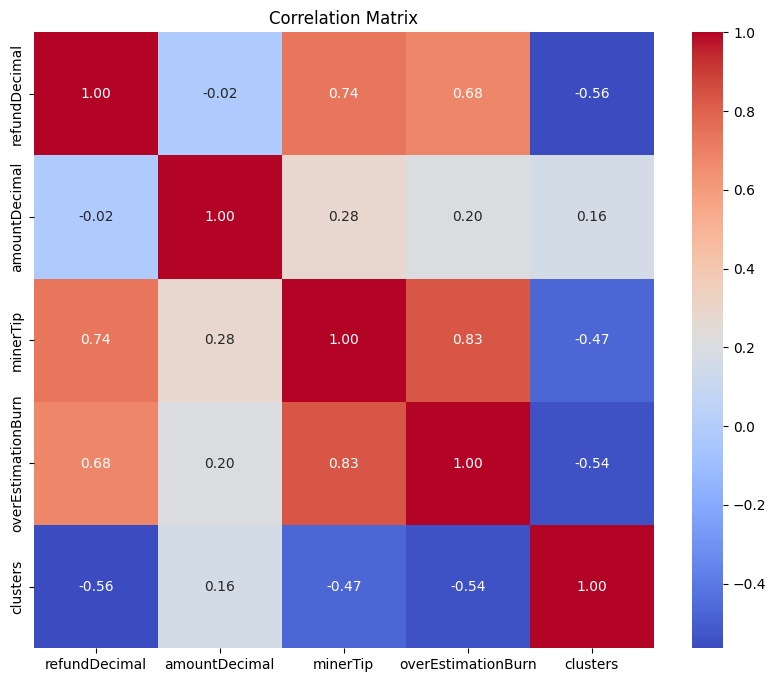

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['refundDecimal', 'amountDecimal', 'minerTip', 'overEstimationBurn', 'clusters']

correlation_data = merged_df[selected_columns]


correlation_matrix = correlation_data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()
